In [1]:
import pandas as pd

arquivo = pd.read_csv("Dados.csv")
#arquivo.info()
display(arquivo.head(2))

,CODIGO_IES,NOME_IES,CATEGORIA_ADMINISTRATIVA,ORGANIZACAO_ACADEMICA,CODIGO_CURSO,NOME_CURSO,GRAU,AREA_OCDE,MODALIDADE,SITUACAO_CURSO,QT_VAGAS_AUTORIZADAS,CARGA_HORARIA,CODIGO_AREA_OCDE_CINE,AREA_OCDE_CINE,CODIGO_MUNICIPIO,MUNICIPIO,UF,REGIAO
0,4751,CENTRO UNIVERSITÁRIO UNIFATECIE,Privada com fins lucrativos,Centro Universitário,1556773,ENGENHARIA AGRONÔMICA,Bacharelado,Agronomia,Educação a Distância,Em atividade,1000,4400,301,Agronomia,3541406,Presidente Prudente,SP,SUDESTE
1,1491,CENTRO UNIVERSITÁRIO INTERNACIONAL,Privada com fins lucrativos,Centro Universitário,1186955,LETRAS,Licenciatura,Formação de professor de língua/literatura ver...,Educação a Distância,Em atividade,3000,3992,58,Formação de professor de língua/literatura ver...,2516201,Sousa,PB,NORDESTE


Separando quantidades de vagas liberadas pelo Grau de ensino na região de São Paulo

In [2]:
df = pd.DataFrame(arquivo)

faculdades = df[df['MUNICIPIO'] == 'São Paulo']

faculdades_sp = faculdades[["MUNICIPIO", "GRAU", "QT_VAGAS_AUTORIZADAS",]].groupby(["MUNICIPIO","GRAU"]).sum()

grau_faculdades_sp = faculdades_sp.query('QT_VAGAS_AUTORIZADAS != 0')

display(grau_faculdades_sp)

QT_VAGAS_AUTORIZADAS
MUNICIPIO GRAU                                               
São Paulo Bacharelado                                 4075538
          Licenciatura                                2662769
          Sequencial                                    31143
          Tecnológico                                 6209957
          Área Básica de Ingresso (ABI)                    83

Criando nova tabela com dados analisados


In [12]:
dados = {
    'Grau': [ 'Bacharelado', 'Licenciatura', 'Sequencial', 'Tecnológico', 'ABI'],
    'Qt_vagas': [4075538, 2662769, 31143, 6209957, 83  ]
}

vagas_grau = pd.DataFrame(dados)

print(vagas_grau)

           Grau  Qt_vagas
0   Bacharelado   4075538
1  Licenciatura   2662769
2    Sequencial     31143
3   Tecnológico   6209957
4           ABI        83


Gerando grafico:

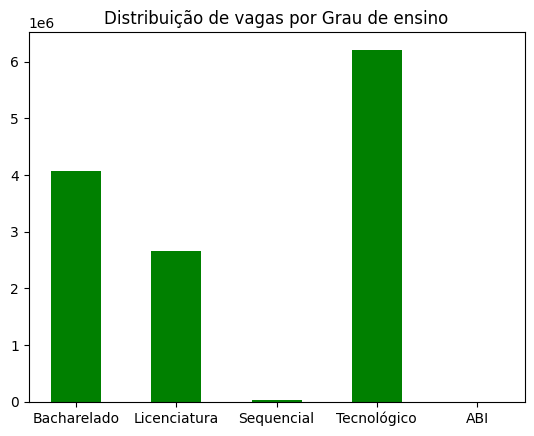

In [22]:
import matplotlib.pyplot as plt


grau = vagas_grau["Grau"]   
qt = vagas_grau["Qt_vagas"]

plt.title("Distribuição de vagas por Grau de ensino")
plt.bar(grau, qt, color='green', width=0.5)
plt.show()